# **19CSE456: Neural Network and Deep Learning (LAB 1)**
#**Perceptron**

# **Perceptron**
In supervised learning, a perceptron is a form of a linear classifier. So, any dataset that can be divided by a single straight line can be classified using a perceptron, i.e., any dataset that looks like this: 
Reference : https://www.askpython.com/python/examples/single-perceptron-neural-network

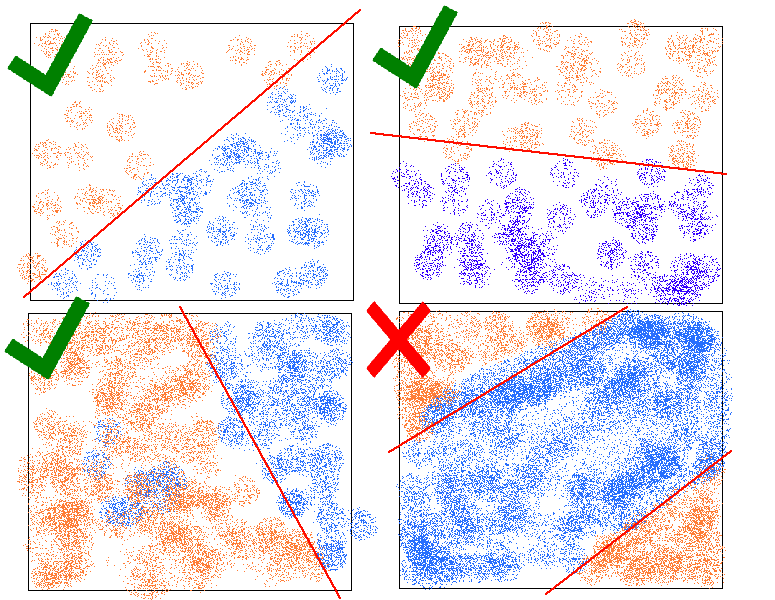

**Create a sample dataset**

In [51]:
import pandas as pd
import numpy as np
import random
#Dataset
df = pd.DataFrame()
df['x1']= [random.randint(1,20) for x in range(10)]
df['x2'] = [random.randint(1,20) for x in range(10)]
print("Shape of the dataset",df.shape)
df.head()


Shape of the dataset (10, 2)


,x1,x2
0,17,5
1,17,4
2,3,20
3,12,2
4,4,1


In [52]:
#Generate labels in such a way that the final data is lineary seperable.  
#every point below the line is y<x and every point above the line is mean y>x '''
label=[]
for i in range(df.shape[0]):
  if df.iloc[i,0] < df.iloc[i,1]:
    label.append(1)
  else:
    label.append(-1)
 
df['label'] = label
df


,x1,x2,label
0,17,5,-1
1,17,4,-1
2,3,20,1
3,12,2,-1
4,4,1,-1
5,13,16,1
6,19,2,-1
7,10,14,1
8,20,18,-1
9,10,14,1


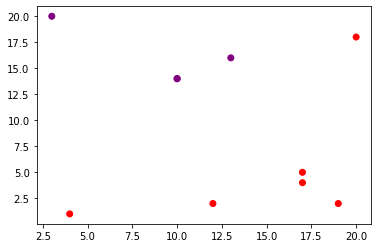

In [53]:
import matplotlib.pyplot as plt
import matplotlib
colors = ['red','green','blue','purple']
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
plt.scatter(df['x1'], df['x2'], c=df['label'], cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

**Initialize weights for the values**

Random uniform distribution for weights:

In [54]:
#weights and bias
weights = [np.round(random.uniform(-0.99,0.99),2) for i in range(2)]
print(weights) # Two weights, one corresponds to x1(column 1) one corresponds to x2(column 2)

[-0.13, -0.81]


Multiply the weights with the input data points and sum:


In [55]:
w = weights.copy()
print(w)
X = [[df.iloc[i,0],df.iloc[i,1]] for i in range(df.shape[0])]
wx = [X[i][0]*w[0]+X[i][1]*w[1] for i in range(df.shape[0])]
print(wx)


[-0.13, -0.81]
[-6.260000000000001, -5.45, -16.590000000000003, -3.18, -1.33, -14.65, -4.09, -12.64, -17.180000000000003, -12.64]


**Creating the Activation Function**

If wx <=0 , then output is 0. Else, the output is 1.



In [56]:
for i in range(df.shape[0]):
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    w[0] = w[0] + err
    w[1] = w[1] + err

In [57]:

print(w)
wx = [X[i][0]*w[0]+X[i][1]*w[1] for i in range(df.shape[0])]
print(wx)


[7.87, 7.1899999999999995]
[169.73999999999998, 162.54999999999998, 167.40999999999997, 108.82, 38.67, 217.35, 163.91, 179.36, 286.82, 179.36]


In [58]:
for i in range(df.shape[0]):
  print('wx : ',wx[i])
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  print('label=',df['label'][i])
  print('pred = ',pred)
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    print('err',err)
    print('before', w[0],w[1])
    w[0] = w[0] + err
    w[1] = w[1] + err
    print('after',w[0],w[1])
  else:
    print('w_i', w[0],w[1])

wx :  169.73999999999998
label= -1
pred =  1
err -2
before 7.87 7.1899999999999995
after 5.87 5.1899999999999995
wx :  162.54999999999998
label= -1
pred =  1
err -2
before 5.87 5.1899999999999995
after 3.87 3.1899999999999995
wx :  167.40999999999997
label= 1
pred =  1
w_i 3.87 3.1899999999999995
wx :  108.82
label= -1
pred =  1
err -2
before 3.87 3.1899999999999995
after 1.87 1.1899999999999995
wx :  38.67
label= -1
pred =  1
err -2
before 1.87 1.1899999999999995
after -0.1299999999999999 -0.8100000000000005
wx :  217.35
label= 1
pred =  1
w_i -0.1299999999999999 -0.8100000000000005
wx :  163.91
label= -1
pred =  1
err -2
before -0.1299999999999999 -0.8100000000000005
after -2.13 -2.8100000000000005
wx :  179.36
label= 1
pred =  1
w_i -2.13 -2.8100000000000005
wx :  286.82
label= -1
pred =  1
err -2
before -2.13 -2.8100000000000005
after -4.13 -4.8100000000000005
wx :  179.36
label= 1
pred =  1
w_i -4.13 -4.8100000000000005


In [59]:
# print the final weights
print('Final weights (%f,%f) : '%(w[0],w[1]))

Final weights (-4.130000,-4.810000) : 


**Testing our model on another data**

In [60]:
#Test Dataset
new_df = pd.DataFrame()
new_df['x'] = [random.randint(1,20) for x in range(100)]
new_df['y'] = [random.randint(1,20) for x in range(100)]


label_text = []
for i in range(new_df.shape[0]):
  if new_df.iloc[i,0] < new_df.iloc[i,1]:
    label_text.append(1)
  else:
    label_text.append(-1)
new_df['labels']=label_text

In [61]:
new_df.head()

,x,y,labels
0,3,1,-1
1,17,3,-1
2,12,19,1
3,10,12,1
4,18,1,-1


In [62]:
#Calculate the prediction using the learned weights w0 and w1
new_wX = w[0]*new_df['x']+w[1]*new_df['y'] 

In [63]:
new_df['given label'] = label_text
pred_label_text = []
 
for i in range(new_df.shape[0]):
  if new_wX[i]>=0:
    pred_label_text.append(-1)
  else:
    pred_label_text.append(1)
 
new_df['predicted labels'] = pred_label_text

In [64]:
new_df

,x,y,labels,given label,predicted labels
0,3,1,-1,-1,1
1,17,3,-1,-1,1
2,12,19,1,1,1
3,10,12,1,1,1
4,18,1,-1,-1,1
...,...,...,...,...,...
95,12,11,-1,-1,1
96,15,14,-1,-1,1
97,15,15,-1,-1,1
98,9,7,-1,-1,1


# **Excercise**

**Excercise 1:** 

Generate the following data , append random labels

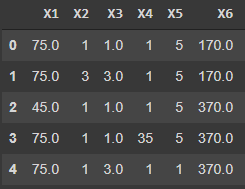

**Excercise 2:**  
Use a single-layer perceptron model to separate classes in the Iris database of the UCI Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html
Describe your neural network design. Tabulate your percentage correct classification results - what can you infer from the network performance?


In [77]:
df = pd.DataFrame()

In [78]:
df['x1'] = [75,75,45,75,75]
df['x2'] = [1,3,1,1,1]
df['x3'] = [1,3,1,1,3]
df['x4'] = [1,1,1,35,1]
df['x5'] = [5,5,5,5,1]
df['x6'] = [170,170,370,370,370]

In [79]:
df

,x1,x2,x3,x4,x5,x6
0,75,1,1,1,5,170
1,75,3,3,1,5,170
2,45,1,1,1,5,370
3,75,1,1,35,5,370
4,75,1,3,1,1,370


In [80]:
l = [-1,1]
df['label'] = [l[np.random.randint(2)] for i in range(df.shape[0])]
df

,x1,x2,x3,x4,x5,x6,label
0,75,1,1,1,5,170,1
1,75,3,3,1,5,170,-1
2,45,1,1,1,5,370,1
3,75,1,1,35,5,370,1
4,75,1,3,1,1,370,1


In [81]:
w = [np.random.normal(-0.99,0.99) for i in range(df.shape[1]-1)]
print(w)

[-2.042504158100433, -1.091680543313376, -0.9777369493792771, 0.013786074445966578, -2.5035240131399763, -1.1665410544700885]


In [91]:
X = [df.iloc[i,:-1].tolist() for i in range(df.shape[0])]

In [105]:
wx = []

for l in X:
  wx.append(sum([x*y for x,y in zip(l,w)]))

print(wx)

[241.92695739860594, 253.78812241322063, -170.10612875239877, 9.087473035751032, 16.677368658389582]


**Creating the Activation Function**

If wx <=0 , then output is 0. Else, the output is 1.



In [106]:
for i in range(df.shape[0]):
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    w[0] = w[0] + err
    w[1] = w[1] + err

In [107]:

print(w)
wx = [X[i][0]*w[0]+X[i][1]*w[1] for i in range(df.shape[0])]
print(wx)


[5.957495841899567, 6.908319456686624, -0.9777369493792771, 0.013786074445966578, -2.5035240131399763, -1.1665410544700885]
[453.72050759915413, 467.5371465125274, 274.99563234216714, 453.72050759915413, 453.72050759915413]


In [108]:
for i in range(df.shape[0]):
  print('wx : ',wx[i])
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  print('label=',df['label'][i])
  print('pred = ',pred)
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    print('err',err)
    print('before', w[0],w[1])
    w[0] = w[0] + err
    w[1] = w[1] + err
    print('after',w[0],w[1])
  else:
    print('w_i', w[0],w[1])

wx :  453.72050759915413
label= 1
pred =  1
w_i 5.957495841899567 6.908319456686624
wx :  467.5371465125274
label= -1
pred =  1
err -2
before 5.957495841899567 6.908319456686624
after 3.9574958418995667 4.908319456686624
wx :  274.99563234216714
label= 1
pred =  1
w_i 3.9574958418995667 4.908319456686624
wx :  453.72050759915413
label= 1
pred =  1
w_i 3.9574958418995667 4.908319456686624
wx :  453.72050759915413
label= 1
pred =  1
w_i 3.9574958418995667 4.908319456686624


In [109]:
# print the final weights
print('Final weights (%f,%f) : '%(w[0],w[1]))

Final weights (3.957496,4.908319) : 
